In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression # Importamos la clase de Regresión Lineal de scikit-learn
from sklearn.metrics import mean_squared_error, r2_score # error
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification
from sklearn.linear_model import Ridge

In [143]:
data = pd.read_csv('datos_limpios.csv') #Lectura de los datos 

Usamos los datos limpios que hemos hecho 


In [144]:
data

,Gender,Education Level,Years of Experience,Salary,Developer,Scientist,Engineer,Sales,Manager,Senior,HR,Coordinator,Project,Software,Junior,Analyst,Data,Operations
0,1.0,1.0,5.0,90000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,2.0,3.0,65000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,1.0,3.0,15.0,150000.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,7.0,60000.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,2.0,20.0,200000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6679,0.0,3.0,20.0,200000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6680,1.0,0.0,3.0,50000.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6681,0.0,1.0,4.0,55000.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6682,1.0,2.0,14.0,140000.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Primero haremos regresion lineal para una variable, lo realizaremos las caracteristicas 'Years of Experiene' y 'Race' ya que una tiene mucha correlacion con la caracteristica a medir y la otra muy poca.

In [145]:
x1 = data['Years of Experience']
x2 = data['Education Level']
y = data['Salary']

Dividimos los datos en datos de prueba y datos de entreanamiento. 

In [146]:
x1_train, x1_test, y_train, y_test = train_test_split(x1, y, test_size = 0.25, random_state=0)
x2_train, x2_test, y_train, y_test = train_test_split(x2, y, test_size = 0.25, random_state=0)

In [147]:
x1_train, x1_test = np.array(x1_train).reshape(-1, 1), np.array(x1_test).reshape(-1, 1)
y_train, y_test = np.array(y_train).reshape(-1, 1), np.array(y_test).reshape(-1, 1)
x2_train, x2_test = np.array(x2_train).reshape(-1, 1), np.array(x2_test).reshape(-1, 1)

En la siguiente celda creamos dos funciones, una que entrene y nos de el resultado de un array de 1 dimension (tiene grafica) y otra en general que solo nos da los coeficientes

In [148]:
def show_result_1d(x_train, x_test, y_train, y_test, char = 'Caracteristicas'):
    #Almacenamos el modelo en una variable
    model = LinearRegression()
    # Entrenamos el dataset
    model.fit(x_train, y_train)
    # Prediccion obtenida
    y_pred = model.predict(x_test)
    #Coeficientes
    print('m = ' + str(model.coef_) + ', b = ' + str(model.intercept_)) 
    print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
    print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

    # Graficamos
    #Grafica del conjunto de entrenamiento
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.scatter(x_train, y_train, color="red",label='Sample data')
    plt.plot(x_train, model.predict(x_train), color="blue",label='Regression model')
    plt.title("Sueldo en relación con los años del conjunto de entrenamiento")
    plt.xlabel(char)
    plt.ylabel("Salarios")
    # Grafica del conjunto de prueba
    plt.subplot(1,2,2)
    plt.scatter(x_test, y_test, color="red")
    plt.plot(x_train, model.predict(x_train), color="blue")
    plt.title("Sueldo en relación con los años del conjunto de prueba")
    plt.xlabel(char)
    plt.ylabel("Salarios")

def show_result(x_train, x_test, y_train, y_test):
    #Almacenamos el modelo en una variable
    model = LinearRegression()
    # Entrenamos el dataset
    model.fit(x_train, y_train)
    # Prediccion obtenida
    y_pred = model.predict(x_test)
    #Coeficientes
    print('m = ' + str(model.coef_) + ', b = ' + str(model.intercept_)) 
    print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
    print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
    print('score: ', model.score(x_test, y_test))


m = [[7082.01113811]], b = [58127.33083758]
Mean squared error: 924313811.33
Coefficient of determination: 0.67


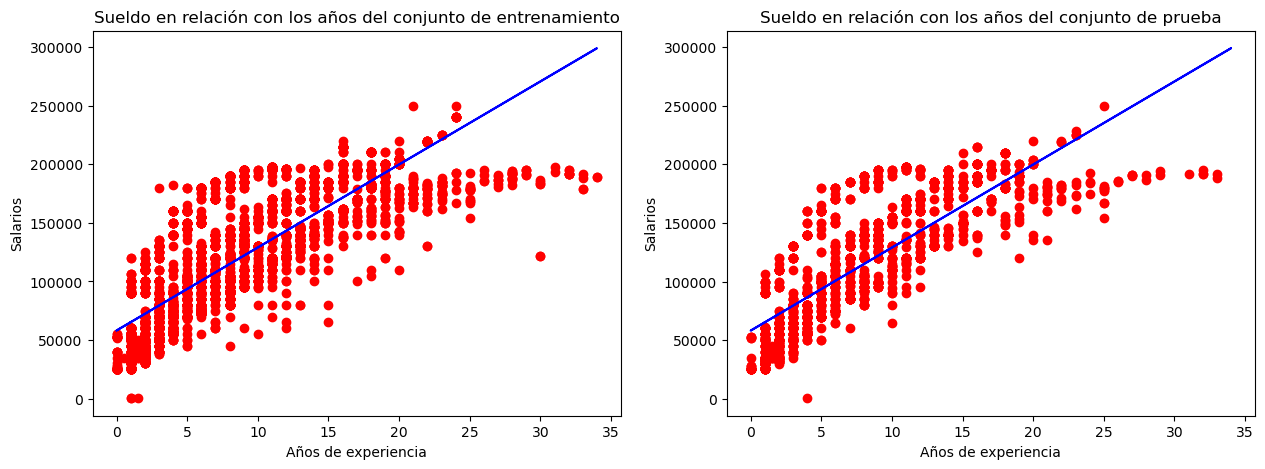

In [149]:
show_result_1d(x1_train, x1_test, y_train, y_test, 'Años de experiencia' )

m = [[38896.94405998]], b = [52460.8463454]
Mean squared error: 1648994820.09
Coefficient of determination: 0.41


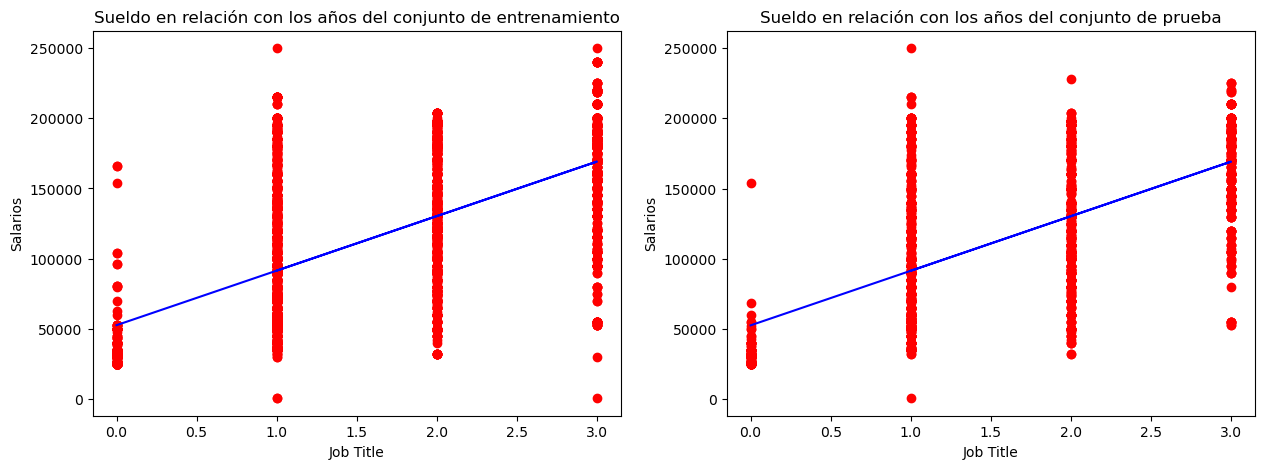

In [150]:
show_result_1d(x2_train, x2_test, y_train, y_test, 'Job Title')


## Regresion lineal multidimensional

In [151]:
X = data.drop(['Salary'], axis=1)
Y = data['Salary']
X_train,X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=0)


In [152]:
show_result(X_train, X_test, Y_train, Y_test)

m = [  3336.70680104   6783.56182429   5469.62953763  -9928.07409321
  -1411.81034702  12123.74660341 -17104.78680092    829.77062644
 -11748.63304072 -13351.5954246  -18149.2274738    9862.19370396
   1109.23627152 -25891.49832216  -8180.21606617  31205.2551176
 -13471.03551766], b = 57918.40790667149
Mean squared error: 596497559.58
Coefficient of determination: 0.79
score:  0.785600438254584


In [153]:
X = data.drop(['Salary'], axis=1)
Y = data['Salary']
X_train,X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=0)

In [154]:
show_result(X_train, X_test, Y_train, Y_test)

m = [  3336.70680104   6783.56182429   5469.62953763  -9928.07409321
  -1411.81034702  12123.74660341 -17104.78680092    829.77062644
 -11748.63304072 -13351.5954246  -18149.2274738    9862.19370396
   1109.23627152 -25891.49832216  -8180.21606617  31205.2551176
 -13471.03551766], b = 57918.40790667149
Mean squared error: 596497559.58
Coefficient of determination: 0.79
score:  0.785600438254584


## Creacion de datos sinteticos (No tiene utilidad en este dataset)

In [155]:
'''def ds(model, char, X, Y):
    Z1 = pd.concat([X, Y], axis=1)
    U = Z1.drop([char], axis = 1)
    V = Z1[char]
    U_os, V_os = model.fit_resample(U, V)
    Z2 = pd.concat([U_os, V_os], axis=1)
    U = Z2.drop(['Salary'], axis=1)
    V = Z2['Salary']
    U = U[['Gender', 'Education Level', 'Job Title', 'Years of Experience', 'Country', 'Race']]
    return U, V'''


"def ds(model, char, X, Y):\n    Z1 = pd.concat([X, Y], axis=1)\n    U = Z1.drop([char], axis = 1)\n    V = Z1[char]\n    U_os, V_os = model.fit_resample(U, V)\n    Z2 = pd.concat([U_os, V_os], axis=1)\n    U = Z2.drop(['Salary'], axis=1)\n    V = Z2['Salary']\n    U = U[['Gender', 'Education Level', 'Job Title', 'Years of Experience', 'Country', 'Race']]\n    return U, V"

In [156]:
#model = RandomOverSampler()
#U, V = ds(model, 'Race', X_train, Y_train)
#U, V = ds(model, 'Job Title', U, V)
#U, V = ds(model, 'Education Level', U2, V2)
#show_result(U, X_test, V, Y_test) 